## Cervical Cancer Risk Profiling Model

#### Importing Packages

In [19]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set_palette('BrBG')

pd.set_option('display.max_columns', None)

#### Loading datasets

In [2]:
kaggle_df = pd.read_csv('../data/kag_risk_factors_cervical_cancer.csv')
print(f'Kaggle dataset columns: {kaggle_df.columns.tolist()}')
print('\n')

study_df = pd.read_excel('../data/cervical_cancer_risk_factors_study.xlsx')
print(f'Study dataset columns: {study_df.columns.to_list()}')

Kaggle dataset columns: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


Study dataset columns: ['1.0 hospital at which patient is being interviewed', '1.1 patient number in the present study (use sequential number enrolled on this ', '1.2 patient initials', '1.3 date of interview (dd/mm/yyyy)', '1.4 case status', '2.1 sex o

#### Data Preprocessing

In [3]:
kaggle_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
# replacing all occurences of '?' with np.nan
kaggle_df = kaggle_df.replace('?', np.nan)

# checking occurences of null values in the dataset
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [5]:
# dropping STDs: Time since first diagnosis and STDs: Time since last diagnosis since most of the values are missing, which means 
# there isn't much valuable information in the two features
kaggle_df = kaggle_df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)

In [6]:
kaggle_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [7]:
kaggle_df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

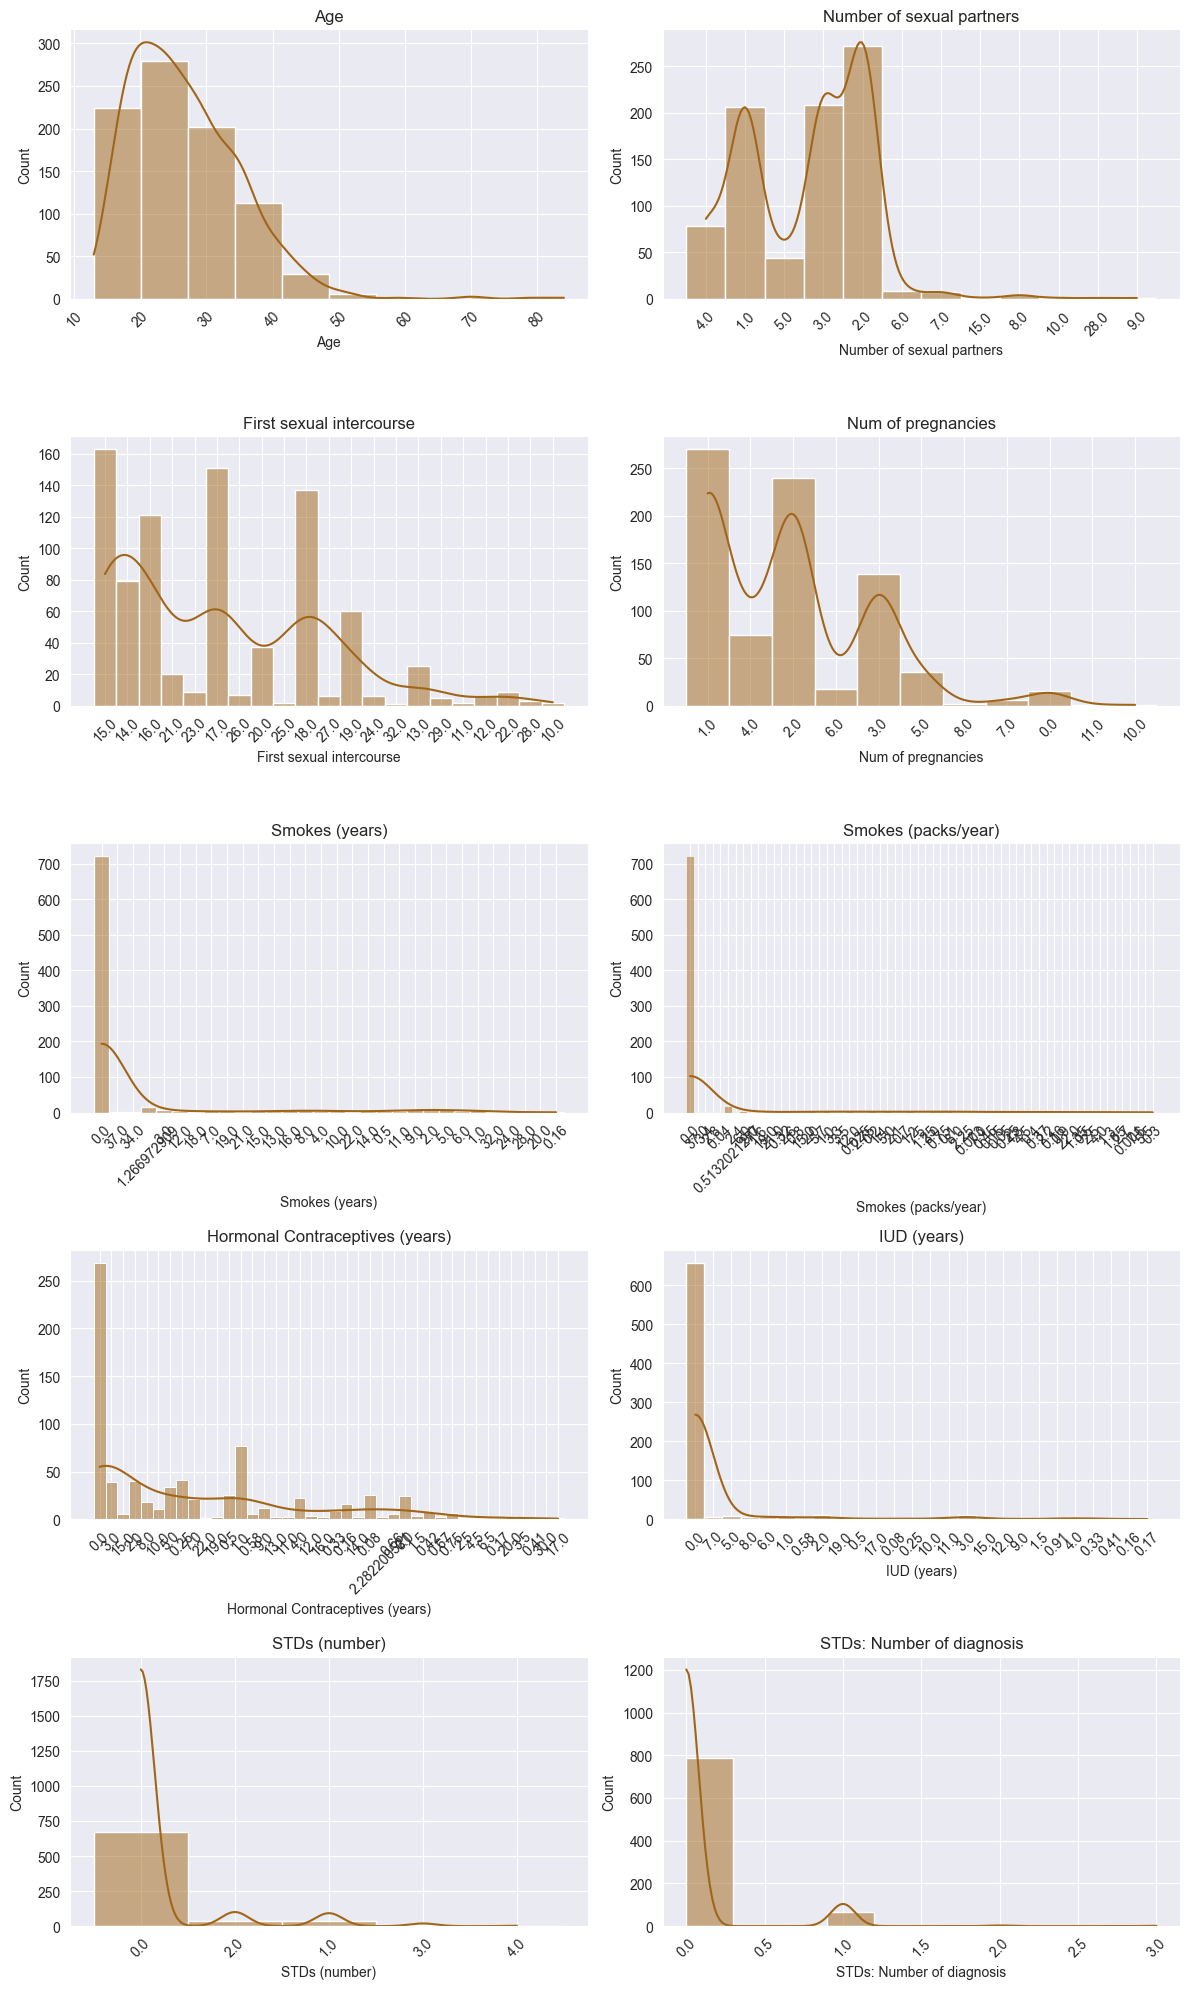

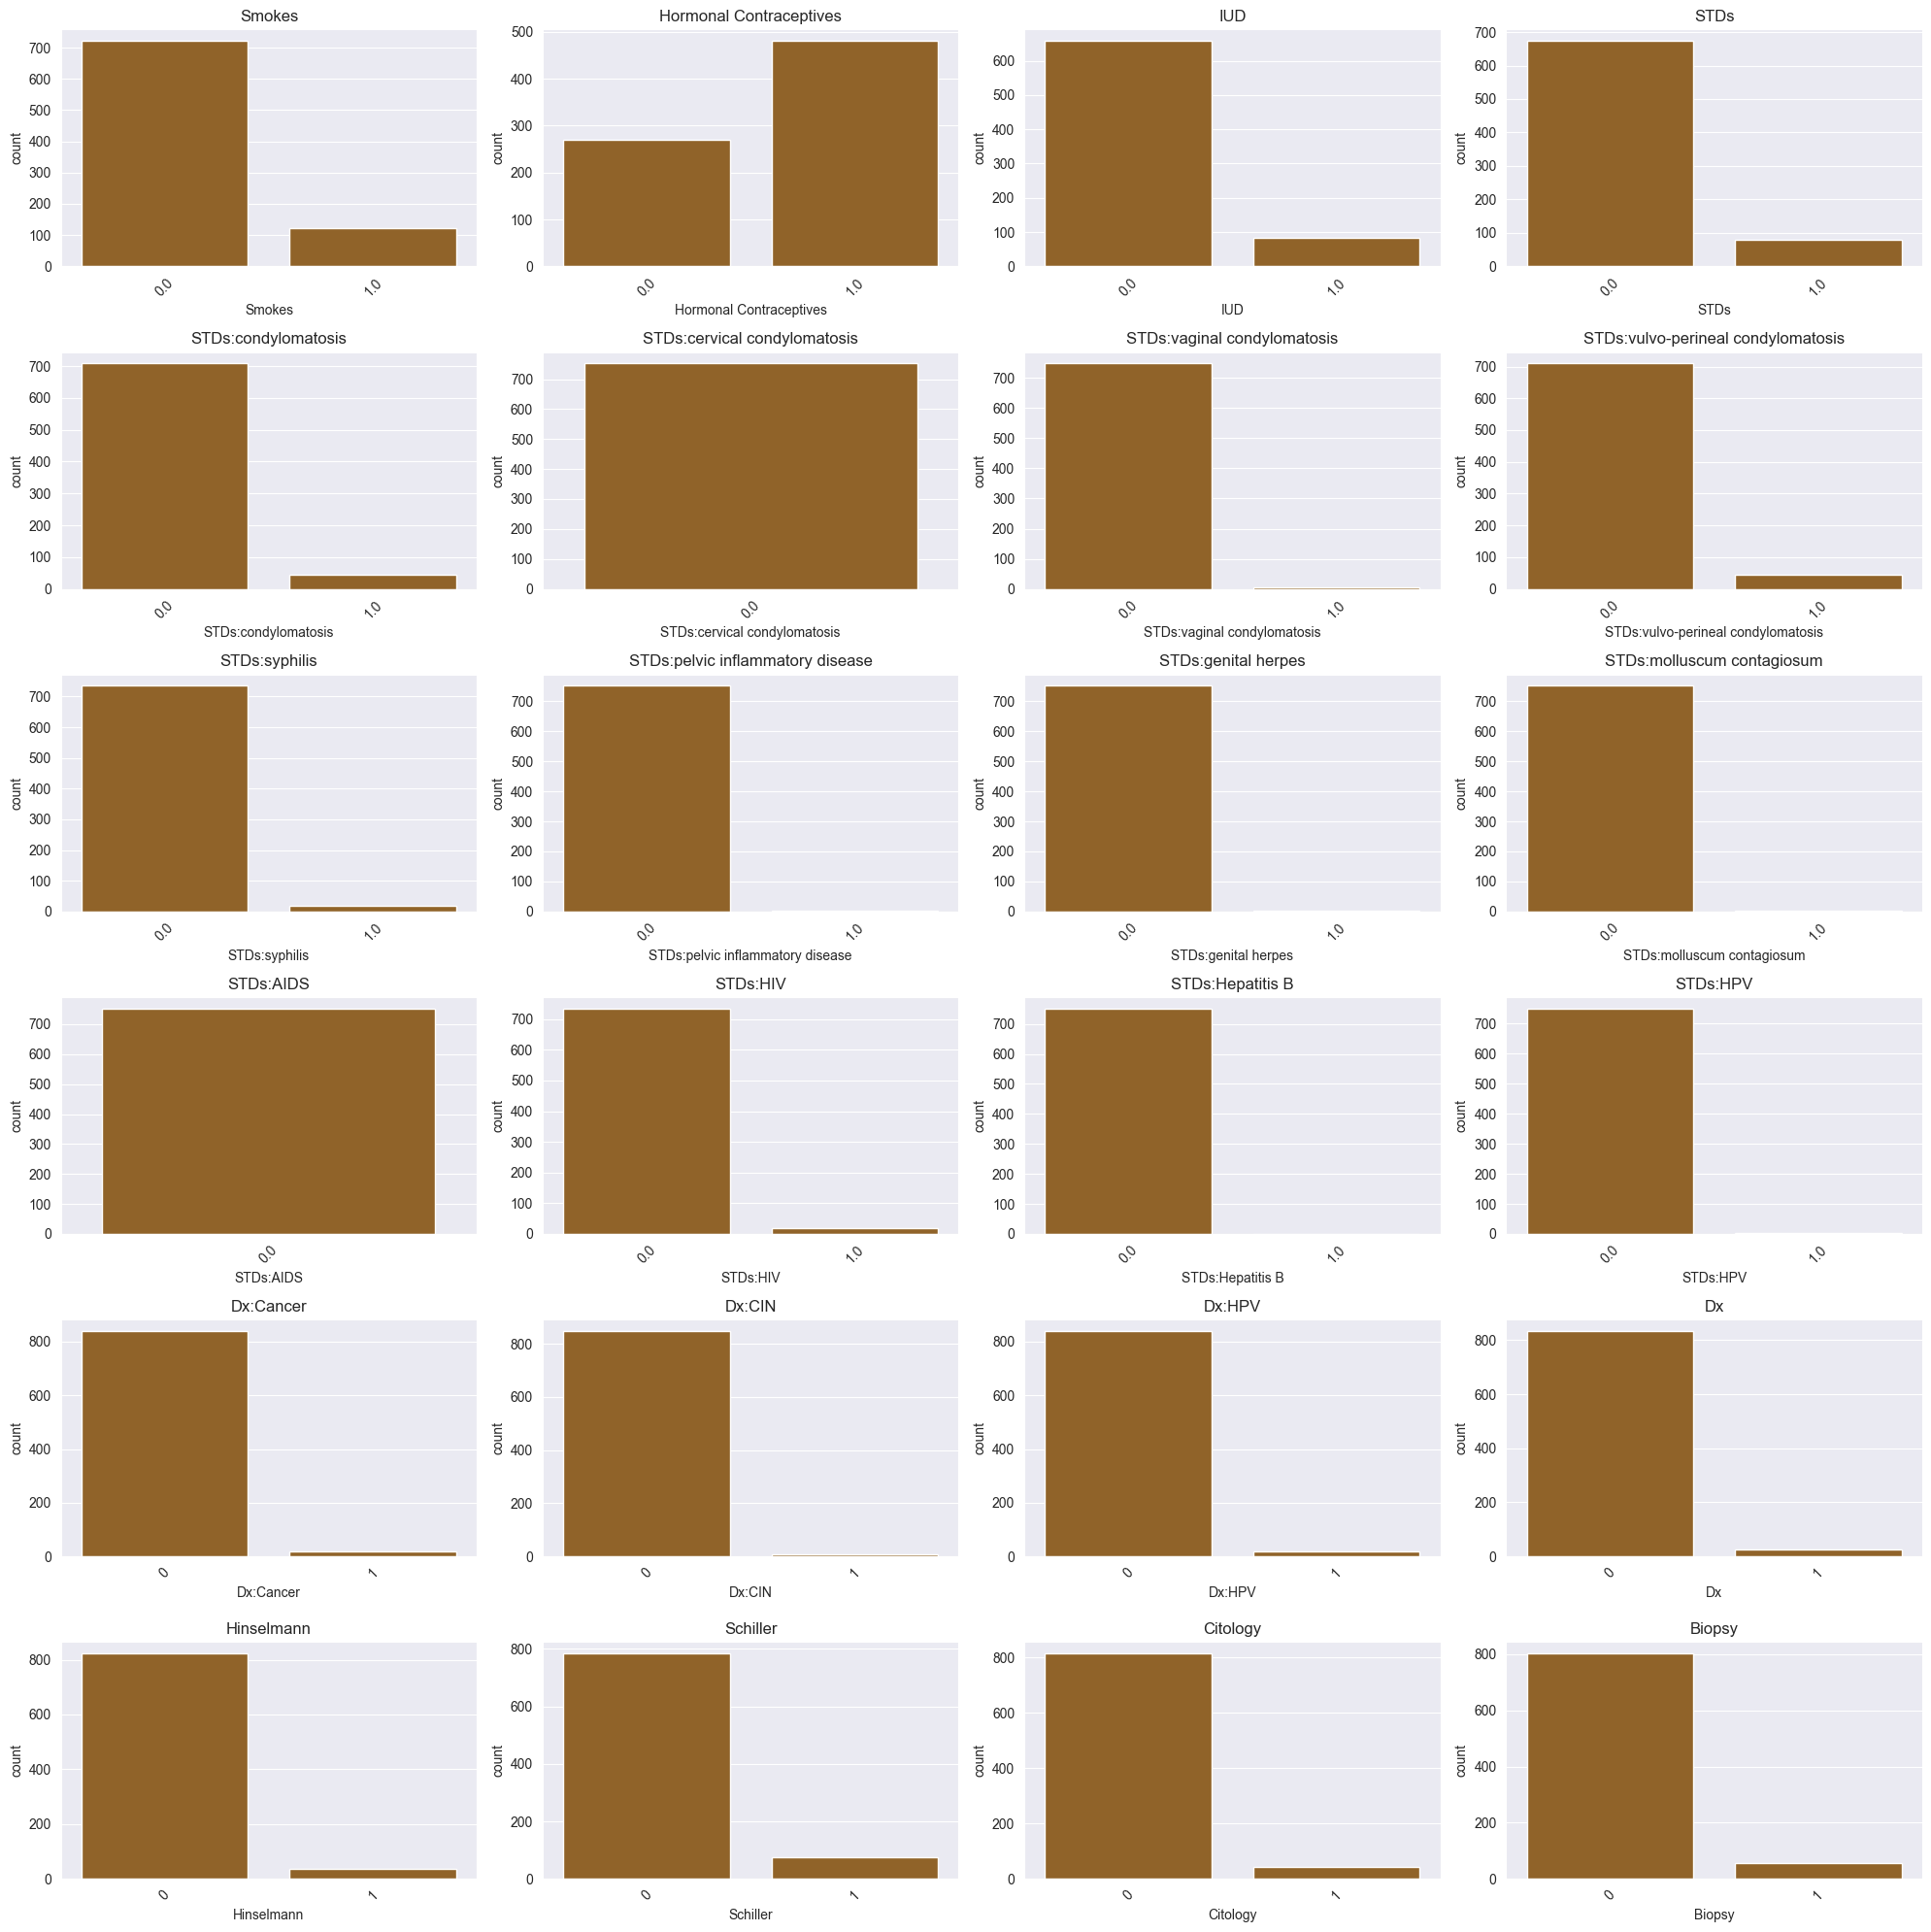

In [ ]:
# checking data distribution
numerical_features = kaggle_df[['Age', 'Number of sexual partners', 'First sexual intercourse',\
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',\
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']]

# plotting distribution for numerical feature
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()

# looping through categorical columns and plot count plots
for i, col in enumerate(numerical_features):
    sns.histplot(kaggle_df[col].dropna(), bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


categorical_features = kaggle_df[['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis',\
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',\
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',\
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',\
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',\
       'STDs:Hepatitis B', 'STDs:HPV', \
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',\
       'Citology', 'Biopsy']]


# plotting distribution for categorical feature
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
axes = axes.flatten()

# looping through categorical columns and plot count plots
for i, col in enumerate(categorical_features):
    sns.countplot(data=kaggle_df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45) 

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- All numerical features have a skewed distribution and the categorical features are imbalanced.
- Null values for numerical columns will be filled using median and categorical columns using mode.

In [ ]:
# replacing null values
# numerical features
for i, col in enumerate(numerical_features):
    kaggle_df[col] = pd.to_numeric(kaggle_df[col], errors='coerce')
    kaggle_df.loc[:, col] = kaggle_df[col].fillna(kaggle_df[col].median())
    
# categorical features
for i, col in enumerate(categorical_features):
    kaggle_df[col] = pd.to_numeric(kaggle_df[col], errors='coerce')
    kaggle_df[col] = kaggle_df[col].fillna(kaggle_df[col].mode()[0])

kaggle_df = kaggle_df.apply(lambda col: col.round(0).astype('Int64'))

kaggle_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1,17,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# info
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 858 non-null    Int64
 1   Number of sexual partners           858 non-null    Int64
 2   First sexual intercourse            858 non-null    Int64
 3   Num of pregnancies                  858 non-null    Int64
 4   Smokes                              858 non-null    Int64
 5   Smokes (years)                      858 non-null    Int64
 6   Smokes (packs/year)                 858 non-null    Int64
 7   Hormonal Contraceptives             858 non-null    Int64
 8   Hormonal Contraceptives (years)     858 non-null    Int64
 9   IUD                                 858 non-null    Int64
 10  IUD (years)                         858 non-null    Int64
 11  STDs                                858 non-null    Int64
 12  STDs (nu

In [45]:
kaggle_df.corr()[['Dx:Cancer']].sort_values(by='Dx:Cancer', ascending=False)

,Dx:Cancer
Dx:Cancer,1.000000
Dx:HPV,0.886508
Dx,0.665647
STDs:HPV,0.330203
Biopsy,0.160905
Schiller,0.157812
Hinselmann,0.134264
IUD,0.117166
Citology,0.113446
Age,0.110340


#### Modelling

In [18]:
target_column = "Dx:Cancer"

X = kaggle_df.drop(columns=[target_column])  # features
y = kaggle_df[target_column]  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_bal, y_train_bal)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  

# evaluating performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "ROC AUC Score", "F1 Score"],
    "Score": [accuracy, precision, recall, roc_auc, f1]
})

print(metrics_df)

          Metric     Score
0       Accuracy  0.988372
1      Precision  0.666667
2         Recall  1.000000
3  ROC AUC Score  0.995536
4       F1 Score  0.800000



Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       168
         1.0       0.67      1.00      0.80         4

    accuracy                           0.99       172
   macro avg       0.83      0.99      0.90       172
weighted avg       0.99      0.99      0.99       172



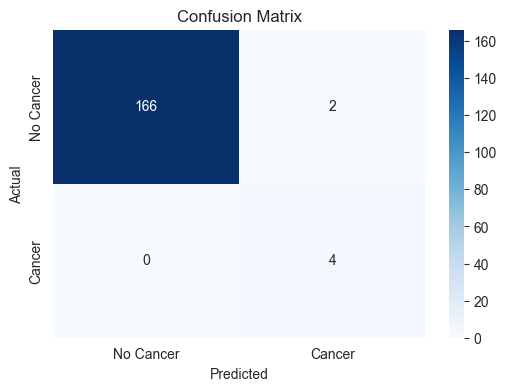

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# generating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()